In [70]:
# The Five Features being utilzed in this project
# 1. Reading in data from 4 local cvs files I have downloaded from the website kagggle.com and then # using them to create data frames with which to perform calculations to see if there is
# a relationship between the varibales in question, in this case a country's minnimum wage and
# its wolrd happiness score.
# 2. Using built in pandas functions like 'drop', 'rename', 'insert', 'set_index', '.loc', 
# and 'merge' to clean and organize the data.
# 3. Use 

In [71]:
# I would like to compare the average World Happiness score 
# for the years 2015-2018 with the average minimum wage from those same years 
# for countries that are present in both datasets.
# I would like to make and (x, y) graph using the minimum wage and happiness 
# index variables to see if there is a correlation between average minimum wages
# and average happiness score between countries.

In [72]:
cd Desktop

[Errno 2] No such file or directory: 'Desktop'
/Users/clayfarris/Desktop


In [73]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
# importing datasets
mini = pd.read_csv('MINIMUM_WAGES.csv')
hap15 = pd.read_csv('Happiness2015.csv')
hap16 = pd.read_csv('Happiness2016.csv')
hap17 = pd.read_csv('Happiness2017.csv')
hap18 = pd.read_csv('Happiness2018.csv')

In [75]:
# Renaming columns and rows in the datasets that use different 
# column names or text ids for the same values between the respective 
# sets to avoid generating any missing info once I deploy the merge function.
# Columns that are not mutually present across all respective happiness datasets 
# are dropped



mini['Country'] = mini['Country'].replace(['Korea', 'Slovak Republic', 'Russian Federation'], 
                                        ['South Korea', 'Slovakia', 'Russia'])
mini = mini.drop(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                 '2009', '2010', '2011', '2012', '2013', '2014'], axis=1)

hap15 = hap15.drop(['Standard Error', 'Region', 'Happiness Rank', 'Dystopia Residual'], axis=1)
hap15 = hap15.rename(columns={'Family':'Social Support','Health (Life Expectancy)':'Health life expectancy'})
hap16 = hap16.drop(['Lower Confidence Interval','Upper Confidence Interval', 'Region',
                    'Happiness Rank', 'Dystopia Residual'],axis=1)
hap16 = hap16.rename(columns={'Family':'Social Support', 'Health (Life Expectancy)':'Health life expectancy'})
hap17 = hap17.drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank', 'Dystopia.Residual'], axis=1)
hap17 = hap17.rename(columns={'Happiness.Score':'Happiness Score', 
                              'Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Family':'Social Support', 
                              'Health..Life.Expectancy.':'Health life expectancy',
                              'Trust..Government.Corruption.':'Trust (Government Corruption)'})
hap17.insert(7, 'Generosity', hap17.pop('Generosity'))
hap18 = hap18.drop(['Overall rank'], axis=1)
hap18.insert(7, 'Generosity', hap18.pop('Generosity'))
hap18 = hap18.rename(columns={'Country or region':'Country', 'Score':'Happiness Score',
                             'GDP per capita':'Economy(GDP per Capita)', 'Freedom to make life choices':
                             'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})





In [76]:
mini.head()

,Country,2015,2016,2017,2018
0,Australia,22718.9,22982.2,23187.2,23975.6
1,Belgium,22119.2,21908.5,21882.2,21654.4
2,Canada,17338.9,17606.8,17913.0,19811.1
3,Chile,6534.6,6893.9,7178.7,7319.5
4,Czech Republic,8217.9,8783.1,9525.6,10342.4


In [77]:
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  31 non-null     object 
 1   2015     31 non-null     float64
 2   2016     31 non-null     float64
 3   2017     31 non-null     float64
 4   2018     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [78]:
hap15.head()

,Country,Happiness Score,Economy (GDP per Capita),Social Support,Health life expectancy,Freedom,Trust (Government Corruption),Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [79]:
hap16.head()

,Country,Happiness Score,Economy (GDP per Capita),Social Support,Health life expectancy,Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [80]:
hap17.head()

,Country,Happiness Score,Economy (GDP per Capita),Social Support,Health life expectancy,Freedom,Trust (Government Corruption),Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [81]:
hap18.head()

,Country,Happiness Score,Economy(GDP per Capita),Social support,Healthy life expectancy,Freedom,Trust (Government Corruption),Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [82]:
# Creating a new data frame by merging the minimum wage dataset with the happiness 
# datasets using countries that are present in all the respective data sets as the criteria 

minihappy = pd.merge(mini, hap15, on='Country', how='inner', suffixes=('_mini', 'hap15'))
minihappy = pd.merge(minihappy, hap16, on='Country', how='inner', suffixes=('', 'hap16'))
minihappy = pd.merge(minihappy, hap17, on='Country', how='inner', suffixes=('', 'hap17'))
minihappy = pd.merge(minihappy, hap18, on='Country', how='inner', suffixes=('', 'hap18'))

pd.set_option('display.max_columns', None)

In [83]:
# renaming columns of interest in new data frame 
minihappy = minihappy.rename(columns={'Happiness Score':'Happiness Score 2015',
                                      'Happiness Scorehap16':'Happiness Score 2016',
                                      'Happiness Scorehap17':'Happiness Score 2017',
                                      'Happiness Scorehap18':'Happiness Score 2018'})


minihappy.head()


,Country,2015,2016,2017,2018,Happiness Score 2015,Economy (GDP per Capita),Social Support,Health life expectancy,Freedom,Trust (Government Corruption),Generosity,Happiness Score 2016,Economy (GDP per Capita)hap16,Social Supporthap16,Health life expectancyhap16,Freedomhap16,Trust (Government Corruption)hap16,Generosityhap16,Happiness Score 2017,Economy (GDP per Capita)hap17,Social Supporthap17,Health life expectancyhap17,Freedomhap17,Trust (Government Corruption)hap17,Generosityhap17,Happiness Score 2018,Economy(GDP per Capita),Social support,Healthy life expectancy,Freedomhap18,Trust (Government Corruption)hap18,Generosityhap18
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [84]:
#slicing off a new dataframe to measure average values of minimum wage and happiness scores for the years 2015-2018
minimum_wage = minihappy.loc[:,['Country', '2015','2016','2017','2018']]

In [85]:
minimum_wage.head()

,Country,2015,2016,2017,2018
0,Australia,22718.9,22982.2,23187.2,23975.6
1,Belgium,22119.2,21908.5,21882.2,21654.4
2,Canada,17338.9,17606.8,17913.0,19811.1
3,Chile,6534.6,6893.9,7178.7,7319.5
4,Czech Republic,8217.9,8783.1,9525.6,10342.4


In [86]:
# finding the average minimum wage for each country over the years 2015-2018
minimum_wage['Wages']=minimum_wage.mean(axis=1)

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_2713/1877320986.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minimum_wage['Wages']=minimum_wage.mean(axis=1)


In [87]:
minimum_wage.head()

,Country,2015,2016,2017,2018,Wages
0,Australia,22718.9,22982.2,23187.2,23975.6,23215.975
1,Belgium,22119.2,21908.5,21882.2,21654.4,21891.075
2,Canada,17338.9,17606.8,17913.0,19811.1,18167.450
3,Chile,6534.6,6893.9,7178.7,7319.5,6981.675
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,9217.250


In [88]:
# creating a series featuring the average minimum wage for the years 2015-2018 for all the countries present
# across the repsective datasets
minimum_wage = minimum_wage.set_index('Country')
minimum_wage = minimum_wage.loc[:,['Wages']]
minimum_wage.head()

,Wages
Country,
Australia,23215.975
Belgium,21891.075
Canada,18167.450
Chile,6981.675
Czech Republic,9217.250


In [89]:
# Creating a data frame of the happiness scores for countries during 
# the years 2015-2018 


 
happiness_score = minihappy.loc[:,['Country', 'Happiness Score 2015', 'Happiness Score 2016', 'Happiness Score 2017',
                                  'Happiness Score 2018']]


happiness_score.head()





,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018
0,Australia,7.284,7.313,7.284,7.272
1,Belgium,6.937,6.929,6.891,6.927
2,Canada,7.427,7.404,7.316,7.328
3,Chile,6.670,6.705,6.652,6.476
4,Czech Republic,6.505,6.596,6.609,6.711


In [90]:
# Finding the average happiness score for each country during the years 2015-2018
happiness_score['Happiness Score'] = happiness_score.mean(axis=1)
happiness_score.head()

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_2713/3501970383.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happiness_score['Happiness Score'] = happiness_score.mean(axis=1)


,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score
0,Australia,7.284,7.313,7.284,7.272,7.28825
1,Belgium,6.937,6.929,6.891,6.927,6.92100
2,Canada,7.427,7.404,7.316,7.328,7.36875
3,Chile,6.670,6.705,6.652,6.476,6.62575
4,Czech Republic,6.505,6.596,6.609,6.711,6.60525


In [91]:
# Creating a series using the average happiness scores for each contry during the year 2015-2018 
happiness_score = happiness_score.set_index('Country')
happiness_score = happiness_score.loc[:,['Happiness Score']]

happiness_score.head()

,Happiness Score
Country,
Australia,7.28825
Belgium,6.92100
Canada,7.36875
Chile,6.62575
Czech Republic,6.60525


In [92]:
# Creating data frame that will be used to create graphs
minhap = pd.concat([minimum_wage, happiness_score], axis=1)
#sorting values from highest to lowest
minhap = minhap.sort_values('Wages', ascending=False)
minhap.head()

,Wages,Happiness Score
Country,,
Luxembourg,24397.925,6.89750
Netherlands,23367.375,7.38375
Australia,23215.975,7.28825
Belgium,21891.075,6.92100
France,20987.050,6.49600


In [93]:
# resetting index to facilitate creation of charts and plots
minhap = minhap.reset_index()

In [94]:
minhap.head()

,Country,Wages,Happiness Score
0,Luxembourg,24397.925,6.89750
1,Netherlands,23367.375,7.38375
2,Australia,23215.975,7.28825
3,Belgium,21891.075,6.92100
4,France,20987.050,6.49600


/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_2713/4146419039.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(minhap['Country'], fontsize=12)


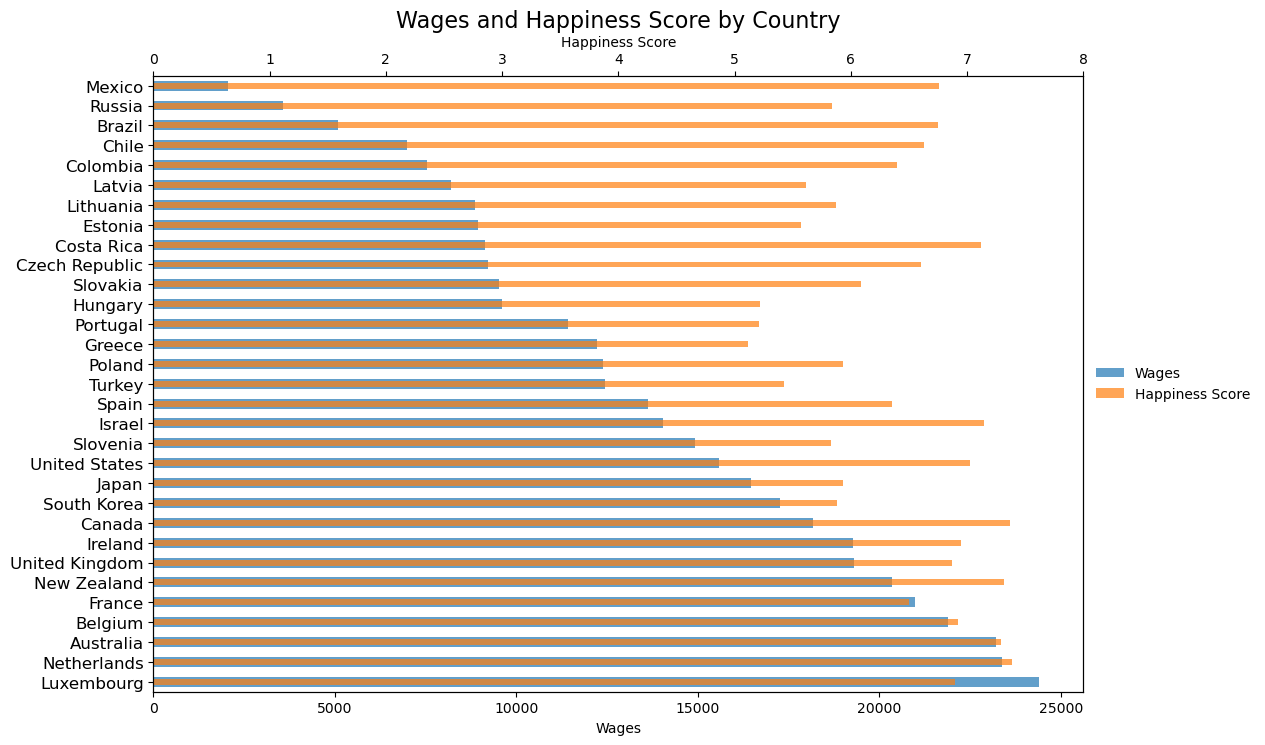

In [95]:
fig, ax = plt.subplots(figsize=(12,8))

wages_bars = ax.barh(minhap['Country'], minhap['Wages'], color='tab:blue', alpha=0.7, height=0.5, label='Wages')
ax.set_xlabel('Wages')
ax.set_yticklabels(minhap['Country'], fontsize=12)

ax2 = ax.twiny()
happiness_bars = ax2.barh(minhap['Country'], minhap['Happiness Score'], color='tab:orange', alpha=0.7, height=0.3, label='Happiness Score')
ax2.set_xlabel('Happiness Score')
ax2.set_xlim(0, 8)

ax.set_ylim(-0.5, len(minhap['Country'])-0.5)

plt.title('Wages and Happiness Score by Country', fontsize=16)

# Set the legend to show both Wages and Happiness Score and place it outside the figure
ax.legend(handles=[wages_bars, happiness_bars], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.show()

In [96]:
import seaborn as sns
import scipy.stats as stats

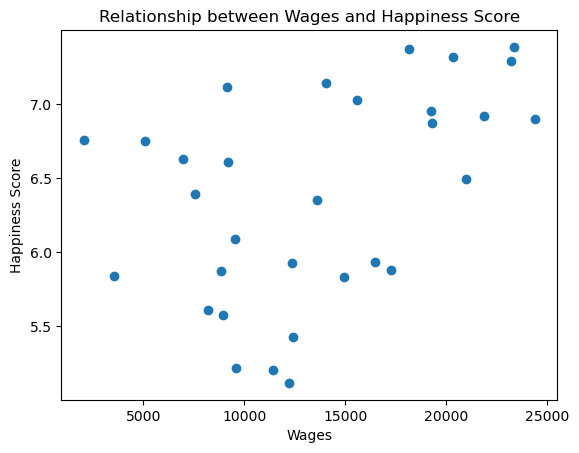

In [97]:
# Create a scatter plot of Wages vs. Happiness Score
plt.scatter(x='Wages', y='Happiness Score', data=minhap)

# Set the x and y axis labels
plt.xlabel('Wages')
plt.ylabel('Happiness Score')

# Set the title of the plot
plt.title('Relationship between Wages and Happiness Score')

# Display the plot
plt.show()

P-value: 0.011


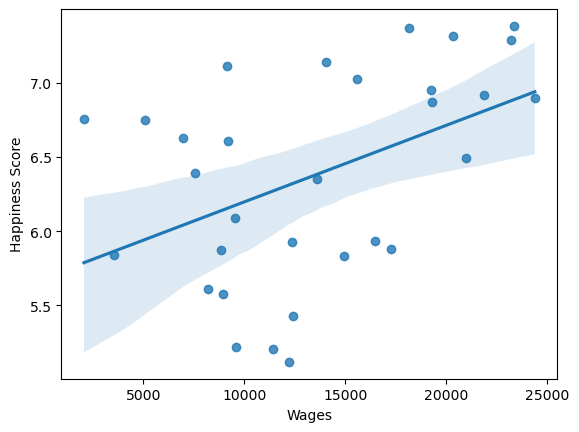

In [98]:
sns.regplot(x='Wages', y='Happiness Score', data=minhap)
slope, intercept, r_value, p_value, std_err = stats.linregress(minhap['Wages'], minhap['Happiness Score'])
print(f'P-value: {p_value:.3f}')